# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

# Importing the Training Dataset 

In [2]:
train = pd.read_csv('train_house.csv')

# Exploratory Data Analysis

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   int64  
 1   MSSubClass     1379 non-null   int64  
 2   MSZoning       1379 non-null   object 
 3   LotFrontage    1127 non-null   float64
 4   LotArea        1379 non-null   int64  
 5   Street         1379 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1379 non-null   object 
 8   LandContour    1379 non-null   object 
 9   Utilities      1379 non-null   object 
 10  LotConfig      1379 non-null   object 
 11  LandSlope      1379 non-null   object 
 12  Neighborhood   1379 non-null   object 
 13  Condition1     1379 non-null   object 
 14  Condition2     1379 non-null   object 
 15  BldgType       1379 non-null   object 
 16  HouseStyle     1379 non-null   object 
 17  OverallQual    1379 non-null   int64  
 18  OverallC

In [5]:
train.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [6]:
# Removing missing values
frontage_index = train[train['LotFrontage'].isnull()].index.tolist()
vnr_type_index = train[train['MasVnrType'].isnull()].index.tolist()
vnr_area_index = train[train['MasVnrArea'].isnull()].index.tolist()
qual_index = train[train['BsmtQual'].isnull()].index.tolist()
cond_index = train[train['BsmtCond'].isnull()].index.tolist()
exposure_index = train[train['BsmtExposure'].isnull()].index.tolist()
type_1_index = train[train['BsmtFinType1'].isnull()].index.tolist()
type_2_index = train[train['BsmtFinType2'].isnull()].index.tolist()
electrical_index = train[train['Electrical'].isnull()].index.tolist()
frontage_index.extend(vnr_type_index)
frontage_index.extend(vnr_area_index)
frontage_index.extend(qual_index)
frontage_index.extend(cond_index)
frontage_index.extend(exposure_index)
frontage_index.extend(type_1_index)
frontage_index.extend(type_2_index)
frontage_index.extend(electrical_index)
missing_list = list(set(frontage_index))
train = train.drop(train.index[missing_list])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1378
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [8]:
#Assessing categorical features
print(train['MSZoning'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']


In [9]:
print(train['Street'].unique())

['Pave' 'Grvl']


In [10]:
print(train['LotShape'].unique())

['Reg' 'IR1' 'IR2' 'IR3']


In [11]:
print(train['LandContour'].unique())

['Lvl' 'Bnk' 'Low' 'HLS']


In [12]:
print(train['Utilities'].unique())

['AllPub']


In [13]:
train.drop(['Utilities'],axis=1,inplace=True)

In [14]:
print(train['LotConfig'].unique())

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


In [15]:
print(train['LandSlope'].unique())

['Gtl' 'Mod' 'Sev']


In [16]:
print(train['Neighborhood'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [17]:
print(train['Condition1'].unique())

['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']


In [18]:
print(train['Condition2'].unique())

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']


In [19]:
print(train['BldgType'].unique())

['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']


In [20]:
print(train['HouseStyle'].unique())

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']


In [21]:
print(train['RoofStyle'].unique())

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']


In [22]:
print(train['RoofMatl'].unique())

['CompShg' 'WdShngl' 'Membran' 'WdShake' 'Tar&Grv' 'Roll' 'ClyTile']


In [23]:
print(train['Exterior1st'].unique())

['VinylSd' 'MetalSd' 'Wd Sdng' 'BrkFace' 'HdBoard' 'WdShing' 'CemntBd'
 'Stucco' 'Plywood' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock']


In [24]:
print(train['Exterior2nd'].unique())

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Wd Sdng' 'Plywood' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']


In [25]:
print(train['MasVnrType'].unique())

['BrkFace' 'None' 'Stone' 'BrkCmn']


In [26]:
print(train['ExterQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


In [27]:
print(train['ExterCond'].unique())

['TA' 'Fa' 'Gd' 'Ex']


In [28]:
print(train['Foundation'].unique())

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Stone']


In [29]:
print(train['BsmtQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


In [30]:
print(train['BsmtCond'].unique())

['TA' 'Gd' 'Fa' 'Po']


In [31]:
print(train['BsmtExposure'].unique())

['No' 'Gd' 'Mn' 'Av']


In [32]:
print(train['BsmtFinType1'].unique())

['GLQ' 'ALQ' 'Unf' 'Rec' 'LwQ' 'BLQ']


In [33]:
print(train['BsmtFinType2'].unique())

['Unf' 'Rec' 'BLQ' 'GLQ' 'LwQ' 'ALQ']


In [34]:
print(train['Heating'].unique())

['GasA' 'GasW' 'Grav' 'OthW']


In [35]:
print(train['HeatingQC'].unique())

['Ex' 'Gd' 'TA' 'Fa' 'Po']


In [36]:
print(train['CentralAir'].unique())

['Y' 'N']


In [37]:
print(train['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [38]:
print(train['KitchenQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


In [39]:
print(train['Functional'].unique())

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2']


In [40]:
print(train['GarageType'].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']


In [41]:
print(train['GarageFinish'].unique())

['RFn' 'Unf' 'Fin']


In [42]:
print(train['GarageQual'].unique())

['TA' 'Fa' 'Gd' 'Ex' 'Po']


In [43]:
print(train['GarageCond'].unique())

['TA' 'Fa' 'Gd' 'Po' 'Ex']


In [44]:
print(train['PavedDrive'].unique())

['Y' 'N' 'P']


In [45]:
print(train['SaleType'].unique())

['WD' 'New' 'COD' 'ConLI' 'CWD' 'ConLw' 'Con' 'ConLD' 'Oth']


In [46]:
print(train['SaleCondition'].unique())

['Normal' 'Abnorml' 'Partial' 'Family' 'Alloca' 'AdjLand']


In [47]:
data = train.drop(['SalePrice'],axis=1)

In [48]:
# Feature Transformation
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['MSZoning'] = encoder.fit_transform(train['MSZoning'])

In [49]:
encoder = LabelEncoder()
train['Street'] = encoder.fit_transform(train['Street'])

In [50]:
encoder = LabelEncoder()
train['LotShape'] = encoder.fit_transform(train['LotShape'])

In [51]:
encoder = LabelEncoder()
train['LandContour'] = encoder.fit_transform(train['LandContour'])

In [52]:
encoder = LabelEncoder()
train['LotConfig'] = encoder.fit_transform(train['LotConfig'])

In [53]:
encoder = LabelEncoder()
train['LandSlope'] = encoder.fit_transform(train['LandSlope'])

In [54]:
encoder = LabelEncoder()
train['Neighborhood'] = encoder.fit_transform(train['Neighborhood'])

In [55]:
encoder = LabelEncoder()
train['Condition1'] = encoder.fit_transform(train['Condition1'])

In [56]:
encoder = LabelEncoder()
train['Condition2'] = encoder.fit_transform(train['Condition2'])

In [57]:
encoder = LabelEncoder()
train['BldgType'] = encoder.fit_transform(train['BldgType'])

In [58]:
encoder = LabelEncoder()
train['HouseStyle'] = encoder.fit_transform(train['HouseStyle'])

In [59]:
encoder = LabelEncoder()
train['RoofStyle'] = encoder.fit_transform(train['RoofStyle'])

In [60]:
encoder = LabelEncoder()
train['RoofMatl'] = encoder.fit_transform(train['RoofMatl'])

In [61]:
encoder = LabelEncoder()
train['Exterior1st'] = encoder.fit_transform(train['Exterior1st'])

In [62]:
encoder = LabelEncoder()
train['Exterior2nd'] = encoder.fit_transform(train['Exterior2nd'])

In [63]:
encoder = LabelEncoder()
train['MasVnrType'] = encoder.fit_transform(train['MasVnrType'])

In [64]:
encoder = LabelEncoder()
train['ExterQual'] = encoder.fit_transform(train['ExterQual'])

In [65]:
encoder = LabelEncoder()
train['ExterCond'] = encoder.fit_transform(train['ExterCond'])

In [66]:
encoder = LabelEncoder()
train['Foundation'] = encoder.fit_transform(train['Foundation'])

In [67]:
encoder = LabelEncoder()
train['BsmtQual'] = encoder.fit_transform(train['BsmtQual'])

In [68]:
encoder = LabelEncoder()
train['BsmtCond'] = encoder.fit_transform(train['BsmtCond'])

In [69]:
encoder = LabelEncoder()
train['BsmtExposure'] = encoder.fit_transform(train['BsmtExposure'])

In [70]:
encoder = LabelEncoder()
train['BsmtFinType1'] = encoder.fit_transform(train['BsmtFinType1'])

In [71]:
encoder = LabelEncoder()
train['BsmtFinType2'] = encoder.fit_transform(train['BsmtFinType2'])

In [72]:
encoder = LabelEncoder()
train['Heating'] = encoder.fit_transform(train['Heating'])

In [73]:
encoder = LabelEncoder()
train['HeatingQC'] = encoder.fit_transform(train['HeatingQC'])

In [74]:
encoder = LabelEncoder()
train['CentralAir'] = encoder.fit_transform(train['CentralAir'])

In [75]:
encoder = LabelEncoder()
train['Electrical'] = encoder.fit_transform(train['Electrical'])

In [76]:
encoder = LabelEncoder()
train['KitchenQual'] = encoder.fit_transform(train['KitchenQual'])

In [77]:
encoder = LabelEncoder()
train['Functional'] = encoder.fit_transform(train['Functional'])

In [78]:
encoder = LabelEncoder()
train['GarageType'] = encoder.fit_transform(train['GarageType'])

In [79]:
encoder = LabelEncoder()
train['GarageFinish'] = encoder.fit_transform(train['GarageFinish'])

In [80]:
encoder = LabelEncoder()
train['GarageQual'] = encoder.fit_transform(train['GarageQual'])

In [81]:
encoder = LabelEncoder()
train['GarageCond'] = encoder.fit_transform(train['GarageCond'])

In [82]:
encoder = LabelEncoder()
train['PavedDrive'] = encoder.fit_transform(train['PavedDrive'])

In [83]:
encoder = LabelEncoder()
train['SaleType'] = encoder.fit_transform(train['SaleType'])

In [84]:
encoder = LabelEncoder()
train['SaleCondition'] = encoder.fit_transform(train['SaleCondition'])

In [85]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
fs = SelectKBest(score_func=f_regression, k=10)
fs.fit_transform(X,y)

array([[  7.,   2.,   2., ...,   2.,   2., 548.],
       [  6.,   3.,   2., ...,   3.,   2., 460.],
       [  7.,   2.,   2., ...,   2.,   2., 608.],
       ...,
       [  7.,   0.,   3., ...,   2.,   1., 252.],
       [  5.,   3.,   3., ...,   2.,   1., 240.],
       [  5.,   2.,   3., ...,   3.,   1., 276.]])

In [86]:
feature_names = list(data.columns.values)
mask = fs.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [87]:
# Feature Names
new_features

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'GarageCars',
 'GarageArea']

In [88]:
train = train.filter(['OverallQual', 'ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageCars','GarageArea','SalePrice'])

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1378
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1094 non-null   int64
 1   ExterQual    1094 non-null   int32
 2   BsmtQual     1094 non-null   int32
 3   TotalBsmtSF  1094 non-null   int64
 4   1stFlrSF     1094 non-null   int64
 5   GrLivArea    1094 non-null   int64
 6   FullBath     1094 non-null   int64
 7   KitchenQual  1094 non-null   int32
 8   GarageCars   1094 non-null   int64
 9   GarageArea   1094 non-null   int64
 10  SalePrice    1094 non-null   int64
dtypes: int32(3), int64(8)
memory usage: 89.7 KB


<AxesSubplot:title={'center':'Overall Quality Score vs House Price'}, xlabel='Overall Quality', ylabel='Price'>

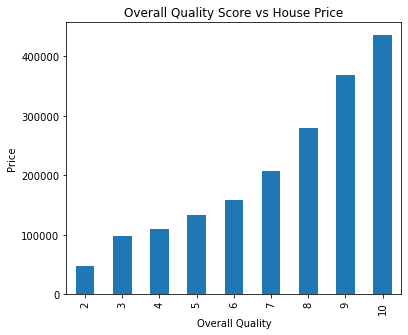

In [90]:
overall_quality_data = train.groupby(['OverallQual'])['SalePrice'].mean()
overall_quality_data.plot(kind='bar', title='Overall Quality Score vs House Price', ylabel='Price',xlabel='Overall Quality', figsize=(6, 5))

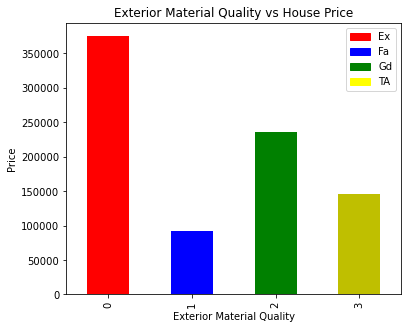

In [114]:
exter_quality_data = train.groupby(['ExterQual'])['SalePrice'].mean()
exter_quality_data.plot(kind='bar', title='Exterior Material Quality vs House Price', ylabel='Price',xlabel='Exterior Material Quality', color=['r', 'b', 'g' ,'y'], figsize=(6, 5))
colors = {'Ex':'red', 'Fa':'blue', 'Gd':'green', 'TA':'yellow'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

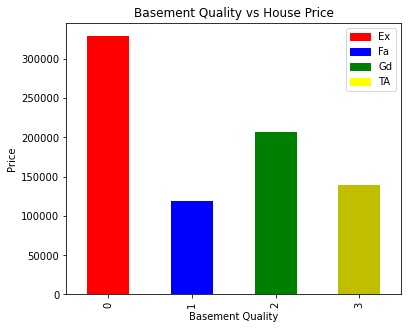

In [113]:
basement_quality_data = train.groupby(['BsmtQual'])['SalePrice'].mean()
basement_quality_data.plot(kind='bar', title='Basement Quality vs House Price', ylabel='Price',xlabel='Basement Quality', color=['r', 'b', 'g' ,'y'], figsize=(6, 5))
colors = {'Ex':'red', 'Fa':'blue', 'Gd':'green', 'TA':'yellow'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

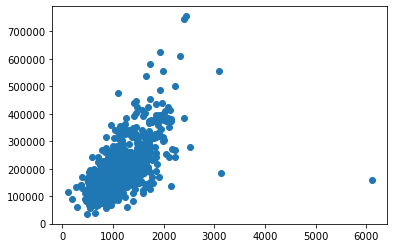

In [93]:
plt.scatter(train['TotalBsmtSF'].values, train['SalePrice'].values)
plt.show()

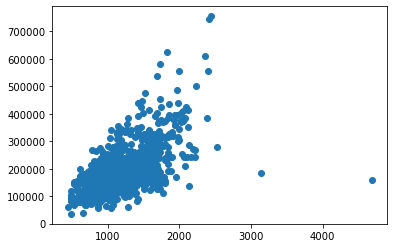

In [94]:
plt.scatter(train['1stFlrSF'].values, train['SalePrice'].values)
plt.show()

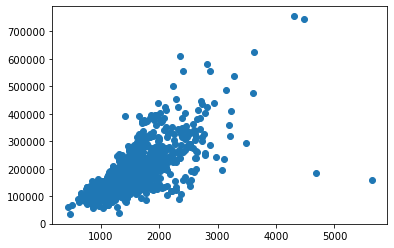

In [95]:
plt.scatter(train['GrLivArea'].values, train['SalePrice'].values)
plt.show()

<AxesSubplot:title={'center':'Full Bathrooms vs House Price'}, xlabel='Full Bathroom', ylabel='Price'>

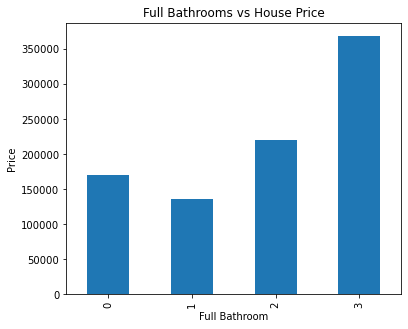

In [96]:
full_bathroom_data = train.groupby(['FullBath'])['SalePrice'].mean()
full_bathroom_data.plot(kind='bar', title='Full Bathrooms vs House Price', ylabel='Price',xlabel='Full Bathroom', figsize=(6, 5))

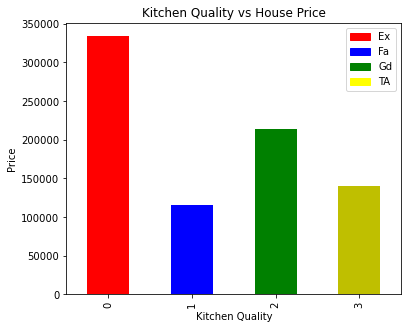

In [115]:
kitchen_quality_data = train.groupby(['KitchenQual'])['SalePrice'].mean()
kitchen_quality_data.plot(kind='bar', title='Kitchen Quality vs House Price', ylabel='Price',xlabel='Kitchen Quality', color=['r', 'b', 'g' ,'y'], figsize=(6, 5))
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

<AxesSubplot:title={'center':'Garage Cars vs House Price'}, xlabel='Garage Cars', ylabel='Price'>

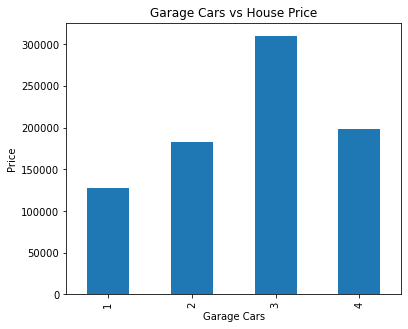

In [116]:
garage_cars_data = train.groupby(['GarageCars'])['SalePrice'].mean()
garage_cars_data.plot(kind='bar', title='Garage Cars vs House Price', ylabel='Price',xlabel='Garage Cars', figsize=(6, 5))

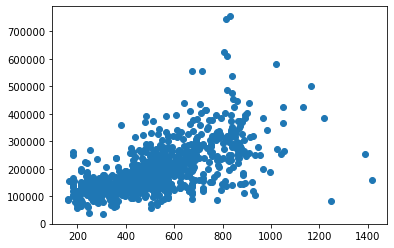

In [117]:
plt.scatter(train['GarageArea'].values, train['SalePrice'].values)
plt.show()

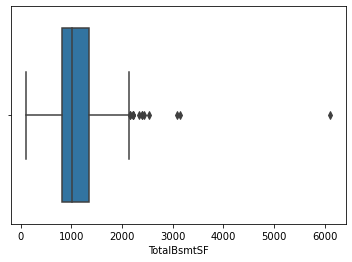

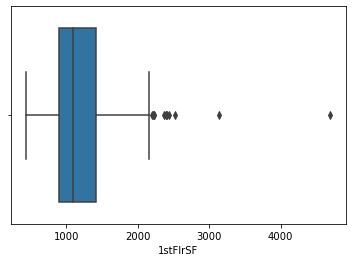

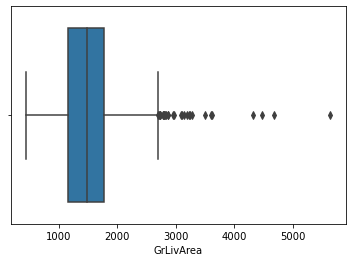

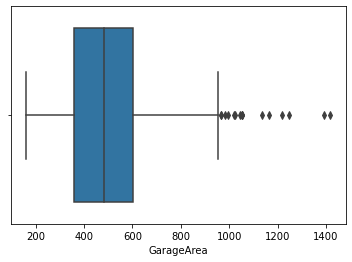

In [118]:
# Detecting and Removing Outliers
numerical_features = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
for column in numerical_features:
    sb.boxplot(train[column])
    plt.show()

In [119]:
for column in numerical_features:
    Q1=train[column].quantile(0.25)
    Q3=train[column].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+ 1.5*IQR
    lower=Q1- 1.5*IQR
    train=train[(train[column]>lower) & (train[column]<upper)]    

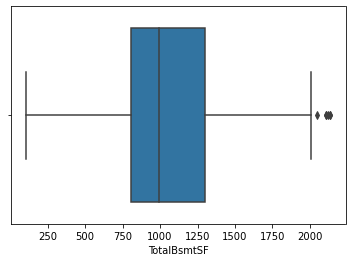

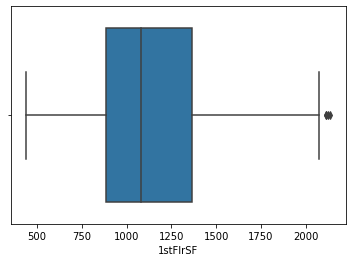

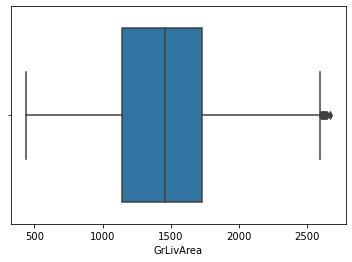

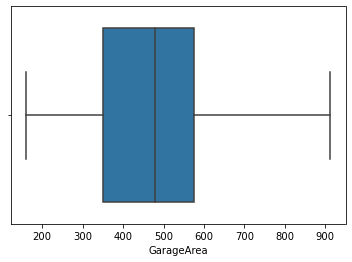

In [120]:
for column in numerical_features:
    sb.boxplot(train[column])
    plt.show()

# Splitting the data into train and test split

In [121]:
target = train['SalePrice']

In [122]:
train.drop(['SalePrice'],axis=1,inplace=True)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size = 0.30,random_state = 42)

# Data Modelling

In [124]:
# Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random = RandomizedSearchCV(estimator = RandomForestRegressor()  ,param_distributions = random_grid,scoring = 'neg_mean_squared_error',cv = 5,n_jobs = -1)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_squared_error')

In [125]:
y_pred = random.predict(X_test)

In [126]:
from math import sqrt,log

In [127]:
y_test_log = []
for val in y_test:
    y_test_log.append(log(val))

In [128]:
y_pred_log = []
for val in y_pred:
    y_pred_log.append(log(val))

In [129]:
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y_test_log, y_pred_log))

In [130]:
print(rms)

0.15304555634045014


In [131]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
random_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
random = RandomizedSearchCV(estimator = GradientBoostingRegressor()  ,param_distributions = random_grid,scoring = 'neg_mean_squared_error',cv = 5,n_jobs = -1)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [500, 1000, 2000],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]},
                   scoring='neg_mean_squared_error')

In [132]:
y_pred = random.predict(X_test)

In [133]:
y_test_log = []
for val in y_test:
    y_test_log.append(log(val))

In [134]:
y_pred_log = []
for val in y_pred:
    y_pred_log.append(log(val))

In [135]:
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y_test_log, y_pred_log))

In [136]:
print(rms)

0.15004686921327265
